In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import json
import baseline
from baseline import *
from decoder import *
from alphabet import *
from train import *
import torch
import numpy as np
from matplotlib import pyplot as plt

torch.__version__

'1.4.0'

In [17]:
LANGUAGE = 'Python'

def filter_ascii(strings):
    'Returns only the strings that can be encoded in ASCII.'
    l = []
    for s in strings:
        try:
            s.encode('ascii')
            if 10 <= len(s) <= 80:
                l.append(s)
        except UnicodeEncodeError:
            pass
        
    return list(set(l))

with open('dataset/large.json') as f:
    multilang_dataset = json.load(f)
    dataset = multilang_dataset[LANGUAGE]
    
    dataset['train'] = filter_ascii(dataset['train'])
    dataset['dev'] = filter_ascii(dataset['dev'])
    dataset['test'] = filter_ascii(dataset['test'])
    
#     tiny_dataset = {
#         'train': dataset['train'][:5],
#         'dev': dataset['train'][:5],
#         'test': dataset['train'][:5],
#     }
    
    print('{} training examples, {} validation examples, {} test exampless'.format(
        len(dataset['train']), 
        len(dataset['dev']),
        len(dataset['test'])))

602762 training examples, 80964 validation examples, 80789 test exampless


In [19]:
parameters = {
    'learning_rate': 1e-4,
    'verbose': True,
    'batch_size': 64,
    'init_scale': 0.01,
    'epochs': 1,
}
train(encoder, decoder, dataset, parameters, alphabet, device)

Epoch 0 iteration 0: loss = 4.852, tp = 10.29 lines/s, ETA 16h16m18s


KeyboardInterrupt: 

In [22]:
(len(data['losses'])*128)/ len(dataset['train'])

12.91654085692197

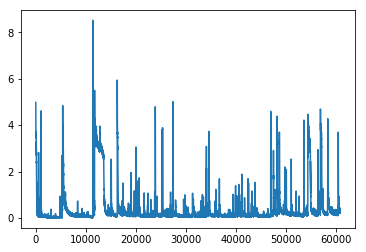

In [10]:
json_data = open('RulesBasedEncoderPython(whitespace=False)_0.001_python.json')
data = json.load(json_data)
data.keys()
plt.plot(np.arange(len(data['losses'])), data['losses'])

In [13]:
SPLIT = 'test'
# load end-to-end models
print(torch.cuda.is_available())
device = torch.device('cpu')


#get alphabet
alph_pth = 'RulesBasedEncoderPython(whitespace=False)_0.001_pythonalphabet.model'
alphabet = AsciiEmbeddedEncoding(device)
# alphabet = AsciiEmbeddedEncoding(*args, **kwargs)
alph_state_dict = torch.load(alph_pth, map_location=device)
alphabet.load_state_dict(alph_state_dict)
alphabet.to(device)
# encoder
encoder = UniformEncoder(.8)

# decoder
# def __init__(self, alphabet, hidden_size=100, max_test_length=200, dropout_rate=0.2,
#                  copy=None):?
decode_pth = 'RulesBasedEncoderPython(whitespace=False)_0.001_pythondecoder.model'
decoder = AutoCompleteDecoderModel(alphabet, hidden_size=512)
decoder.load_state_dict(state_dict=torch.load(decode_pth, map_location=device))
decoder.to(device)
# import pdb; pdb.set_trace()

# for i in range(10):
#     s = random.choice(dataset[SPLIT])
#     compressed = encoder.encode(s)
# #     import pdb; pdb.set_trace()
#     decompressed = decoder([compressed], alphabet)

#     print('String:', repr(s))
#     print('Encoded:', repr(compressed))
#     print('Decoded:', repr(decompressed[0]))
#     print(decompressed[0] == s)

True


AutoCompleteDecoderModel(
  (encoder_lstm): LSTM(50, 512, batch_first=True, bidirectional=True)
  (decoder_lstm): LSTMCell(562, 512)
  (h_proj): Linear(in_features=1024, out_features=512, bias=False)
  (c_proj): Linear(in_features=1024, out_features=512, bias=False)
  (attention_proj): Linear(in_features=1024, out_features=512, bias=False)
  (output_proj): Linear(in_features=1536, out_features=512, bias=False)
  (vocab_proj): Linear(in_features=512, out_features=128, bias=False)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [8]:
def top1accuracy(dataset, decoder):
    return len(list(filter(lambda s: s == decoder([encoder.encode(s)], alphabet)[0],
                         dataset)))/len(dataset)
print('Model without copy train accuracy:', top1accuracy(dataset['train'], decoder))

KeyboardInterrupt: 

In [ ]:
print('hello')

In [6]:
def generate_dumb_dataset():
    'Returns a dataset where all examples are the same string, which consists of 10 times the same letter.'

    SIZE = 200
    l = []

    for i in range(SIZE):
        l.append(random.choice('abcdefghijklmnopqrstuvwxyz') * random.choice([5, 10]))
        
    return {'train': l, 'dev': l, 'test': l}

dumb_dataset = generate_dumb_dataset()

In [11]:
device = torch.device(0) if torch.cuda.is_available() else torch.device('cpu')
print(device)

alphabet = AsciiOneHotEncoding(device)
encoder = baseline.UniformEncoder(0.9)
decoder_copy = AutoCompleteDecoderModel(alphabet, hidden_size=512, copy=COPY_CLASSIC)
decoder_nocopy = AutoCompleteDecoderModel(alphabet, hidden_size=512, copy=None)

cuda:0


In [10]:
parameters = {
    'learning_rate': 1e-4,
    'verbose': True,
    'batch_size': 64,
    'init_scale': 0.01,
    'epochs': 1,
}

train_loss_history = train(encoder, decoder_copy, dataset, parameters, device)
plt.plot(train_loss_history)

> /data/home/BingBong/cs224n-project/train.py(53)train()
-> if save_model_every_epoch:
(Pdb) total_examples
7104
(Pdb) len(training_set)
7050
(Pdb) 7104 / batch_size
111.0
(Pdb) q


BdbQuit: 

In [8]:
len(train_loss_history)

111

Epoch 0 iteration 0: loss = 2.258, tp = 199.14 lines/s, ETA 04h57m16s
Epoch 0 iteration 100: loss = 1.694, tp = 197.61 lines/s, ETA 04h59m01s
Epoch 1 iteration 89: loss = 1.647, tp = 198.04 lines/s, ETA 04h57m50s
Epoch 2 iteration 78: loss = 1.766, tp = 198.01 lines/s, ETA 04h57m21s
Epoch 3 iteration 67: loss = 1.699, tp = 198.36 lines/s, ETA 04h56m17s
Epoch 4 iteration 56: loss = 1.762, tp = 198.26 lines/s, ETA 04h55m53s
Epoch 5 iteration 45: loss = 1.674, tp = 198.10 lines/s, ETA 04h55m36s
Epoch 6 iteration 34: loss = 1.673, tp = 198.26 lines/s, ETA 04h54m49s
Epoch 7 iteration 23: loss = 1.489, tp = 198.30 lines/s, ETA 04h54m14s
Epoch 8 iteration 12: loss = 1.544, tp = 198.32 lines/s, ETA 04h53m39s
Epoch 9 iteration 1: loss = 1.573, tp = 198.44 lines/s, ETA 04h52m56s
Epoch 9 iteration 101: loss = 1.486, tp = 198.56 lines/s, ETA 04h52m13s
Epoch 10 iteration 90: loss = 1.725, tp = 198.61 lines/s, ETA 04h51m37s
Epoch 11 iteration 79: loss = 1.619, tp = 198.65 lines/s, ETA 04h51m01s
Epoc

Epoch 102 iteration 78: loss = 0.267, tp = 198.88 lines/s, ETA 03h56m31s
Epoch 103 iteration 67: loss = 0.212, tp = 198.89 lines/s, ETA 03h55m58s
Epoch 104 iteration 56: loss = 0.280, tp = 198.91 lines/s, ETA 03h55m24s
Epoch 105 iteration 45: loss = 0.276, tp = 198.92 lines/s, ETA 03h54m51s
Epoch 106 iteration 34: loss = 0.286, tp = 198.91 lines/s, ETA 03h54m20s
Epoch 107 iteration 23: loss = 0.222, tp = 198.90 lines/s, ETA 03h53m49s
Epoch 108 iteration 12: loss = 0.285, tp = 198.88 lines/s, ETA 03h53m17s
Epoch 109 iteration 1: loss = 0.217, tp = 198.87 lines/s, ETA 03h52m46s
Epoch 109 iteration 101: loss = 0.259, tp = 198.86 lines/s, ETA 03h52m15s
Epoch 110 iteration 90: loss = 0.273, tp = 198.85 lines/s, ETA 03h51m43s
Epoch 111 iteration 79: loss = 0.261, tp = 198.84 lines/s, ETA 03h51m12s
Epoch 112 iteration 68: loss = 0.302, tp = 198.83 lines/s, ETA 03h50m40s
Epoch 113 iteration 57: loss = 0.260, tp = 198.82 lines/s, ETA 03h50m09s
Epoch 114 iteration 46: loss = 0.273, tp = 198.81 l

Epoch 204 iteration 56: loss = 0.173, tp = 198.63 lines/s, ETA 02h56m08s
Epoch 205 iteration 45: loss = 0.175, tp = 198.63 lines/s, ETA 02h55m36s
Epoch 206 iteration 34: loss = 0.194, tp = 198.62 lines/s, ETA 02h55m04s
Epoch 207 iteration 23: loss = 0.177, tp = 198.62 lines/s, ETA 02h54m32s
Epoch 208 iteration 12: loss = 0.178, tp = 198.62 lines/s, ETA 02h53m59s
Epoch 209 iteration 1: loss = 0.200, tp = 198.63 lines/s, ETA 02h53m27s
Epoch 209 iteration 101: loss = 0.152, tp = 198.63 lines/s, ETA 02h52m54s
Epoch 210 iteration 90: loss = 0.176, tp = 198.63 lines/s, ETA 02h52m22s
Epoch 211 iteration 79: loss = 0.186, tp = 198.63 lines/s, ETA 02h51m50s
Epoch 212 iteration 68: loss = 0.171, tp = 198.62 lines/s, ETA 02h51m18s
Epoch 213 iteration 57: loss = 0.184, tp = 198.62 lines/s, ETA 02h50m46s
Epoch 214 iteration 46: loss = 0.192, tp = 198.62 lines/s, ETA 02h50m14s
Epoch 215 iteration 35: loss = 0.156, tp = 198.62 lines/s, ETA 02h49m41s
Epoch 216 iteration 24: loss = 0.173, tp = 198.62 l

Epoch 306 iteration 34: loss = 0.152, tp = 198.65 lines/s, ETA 01h55m26s
Epoch 307 iteration 23: loss = 0.132, tp = 198.65 lines/s, ETA 01h54m54s
Epoch 308 iteration 12: loss = 0.111, tp = 198.65 lines/s, ETA 01h54m22s
Epoch 309 iteration 1: loss = 0.134, tp = 198.64 lines/s, ETA 01h53m49s
Epoch 309 iteration 101: loss = 0.148, tp = 198.64 lines/s, ETA 01h53m17s
Epoch 310 iteration 90: loss = 0.138, tp = 198.64 lines/s, ETA 01h52m45s
Epoch 311 iteration 79: loss = 0.142, tp = 198.64 lines/s, ETA 01h52m13s
Epoch 312 iteration 68: loss = 0.140, tp = 198.63 lines/s, ETA 01h51m41s
Epoch 313 iteration 57: loss = 0.138, tp = 198.63 lines/s, ETA 01h51m09s
Epoch 314 iteration 46: loss = 0.120, tp = 198.63 lines/s, ETA 01h50m37s
Epoch 315 iteration 35: loss = 0.109, tp = 198.63 lines/s, ETA 01h50m04s
Epoch 316 iteration 24: loss = 0.110, tp = 198.63 lines/s, ETA 01h49m32s
Epoch 317 iteration 13: loss = 0.115, tp = 198.63 lines/s, ETA 01h49m00s
Epoch 318 iteration 2: loss = 0.145, tp = 198.63 li

Epoch 408 iteration 12: loss = 0.111, tp = 198.67 lines/s, ETA 00h54m45s
Epoch 409 iteration 1: loss = 0.095, tp = 198.66 lines/s, ETA 00h54m13s
Epoch 409 iteration 101: loss = 0.106, tp = 198.66 lines/s, ETA 00h53m41s
Epoch 410 iteration 90: loss = 0.119, tp = 198.66 lines/s, ETA 00h53m09s
Epoch 411 iteration 79: loss = 0.119, tp = 198.65 lines/s, ETA 00h52m36s
Epoch 412 iteration 68: loss = 0.102, tp = 198.65 lines/s, ETA 00h52m04s
Epoch 413 iteration 57: loss = 0.075, tp = 198.66 lines/s, ETA 00h51m32s
Epoch 414 iteration 46: loss = 0.104, tp = 198.66 lines/s, ETA 00h51m00s
Epoch 415 iteration 35: loss = 0.083, tp = 198.66 lines/s, ETA 00h50m27s
Epoch 416 iteration 24: loss = 0.077, tp = 198.67 lines/s, ETA 00h49m55s
Epoch 417 iteration 13: loss = 0.116, tp = 198.67 lines/s, ETA 00h49m23s
Epoch 418 iteration 2: loss = 0.109, tp = 198.67 lines/s, ETA 00h48m51s
Epoch 418 iteration 102: loss = 0.095, tp = 198.67 lines/s, ETA 00h48m18s
Epoch 419 iteration 91: loss = 0.093, tp = 198.67 l

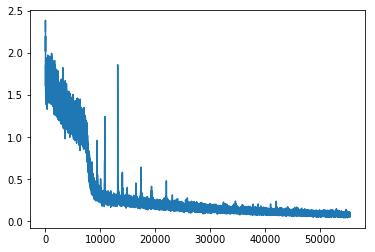

In [86]:
parameters = {
    'learning_rate': 1e-4,
    'verbose': True,
    'batch_size': 64,
    'init_scale': 0.01,
    'epochs': 500,
}

train_loss_history_nocopy = train(encoder, decoder_nocopy, dataset, parameters, device)
plt.plot(train_loss_history_nocopy)

# End-to-end samples

In [ ]:
SPLIT = 'train'
# load end-to-end models
alphabet = torch.load('UniformEncoder(0.80)_0.005_pythonalphabet.model')
encoder = UniformEncoder(.8)
decoder = torch.load('UniformEncoder(0.80)_0.005_pythondecoder.model')
for i in range(10):
    s = random.choice(dataset[SPLIT])
    import pdb; pdb.set_trace()
    compressed = encoder.encode(s)

    decompressed = decoder([compressed])

    print('String:', repr(s))
    print('Encoded:', repr(compressed))
    print('Decoded:', repr(decompressed[0]))
    print(decompressed[0] == s)

> <ipython-input-5-9a2b5526c81f>(9)<module>()->None
-> compressed = encoder.encode(s)
(Pdb) s
--Call--
> /data/home/BingBong/cs224n-project/baseline.py(18)encode()
-> def encode(self, s):
(Pdb) dataset[SPLIT][0]
*** NameError: name 'dataset' is not defined
(Pdb) dataset.shape
*** NameError: name 'dataset' is not defined
--KeyboardInterrupt--
--KeyboardInterrupt--


In [117]:
def top1accuracy(dataset, decoder):
    return len(list(filter(lambda s: s == decoder([encoder.encode(s)])[0],
                         dataset)))/len(dataset)

print('Model with copy train accuracy:', top1accuracy(dataset['train'], decoder_copy))
print('Model without copy train accuracy:', top1accuracy(dataset['train'], decoder_nocopy))

Model with copy validation accuracy: 0.08808510638297873
Model without copy validation accuracy: 0.3516312056737589


# Save models

In [120]:
# Save just the state dict
torch.save(decoder_copy.state_dict(), 'decoder_python_copy_small.pts')
torch.save(decoder_nocopy.state_dict(), 'decoder_python_nocopy_small.pts')